In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

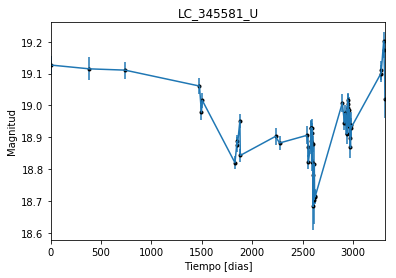

In [2]:
data = np.genfromtxt('LC_345581_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_345581_U')
plt.savefig("LC_345581_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

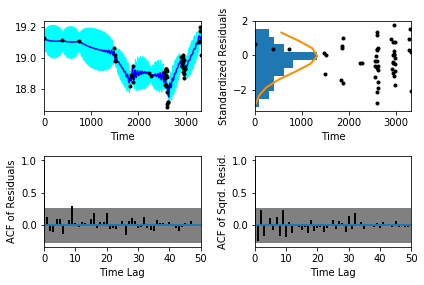

In [5]:
sample.assess_fit()

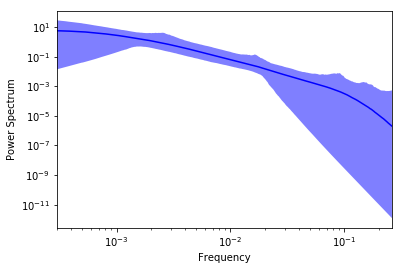

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

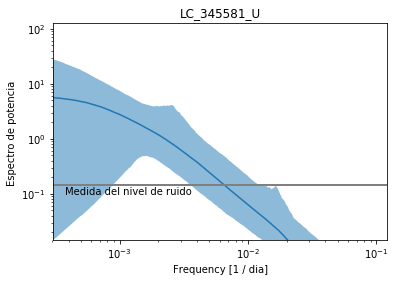

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_345581_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_345581_U')

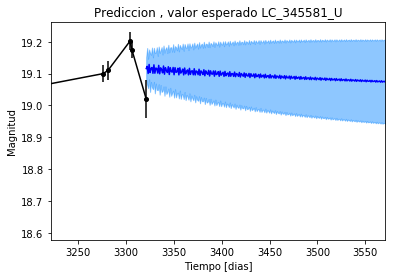

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_345581_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_345581_U')

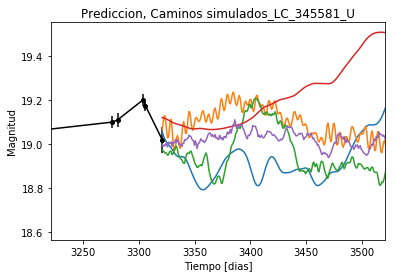

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_345581_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


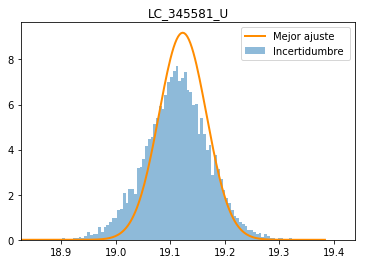

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_345581_U')
plt.savefig("Mejor_ajuste_LC_345581_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_345581_U')

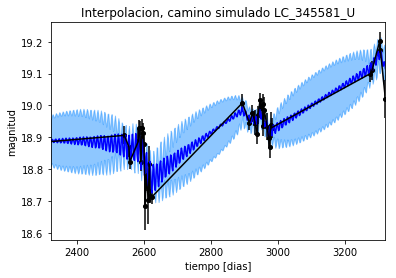

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_345581_U')

Text(0.5,1,'Interpolacion, camino simulado LC_345581_U')

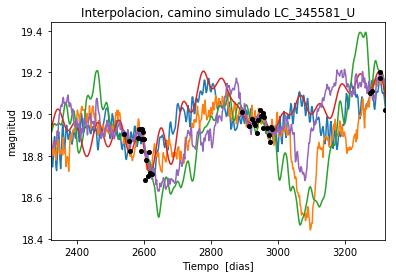

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_345581_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 787.602699966
Median: 0.0155596074945
Standard deviation: 0.0968483624531
68% credibility interval: [ 0.00201994  0.11696161]
95% credibility interval: [ 0.00042472  0.37159742]
99% credibility interval: [  3.40323320e-04   4.91661549e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 563.042513773
Median: 0.0105104976884
Standard deviation: 0.0747278995445
68% credibility interval: [ 0.00135866  0.07152134]
95% credibility interval: [ 0.00038107  0.27694303]
99% credibility interval: [  3.21964341e-04   4.52418662e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 295.288896534
Median: 0.0956179487826
Standard deviation:

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1202.5002412
Median: 87.5933725645
Standard deviation: 1.80247123319
68% credibility interval: [ 85.60422954  88.98993438]
95% credibility interval: [ 83.09584462  90.09733069]
99% credibility interval: [ 81.19169746  90.71059169]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 544.696913522
Median: 1.1148622729
Standard deviation: 1.40908095745
68% credibility interval: [ 0.26358753  2.92852957]
95% credibility interval: [ 0.0647948   5.11193458]
99% credibility interval: [ 0.02935266  7.12120526]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 455.490746523
Median: 1.23667345308
Standard deviation: 3.8349259465
68% credibility interval: [ 0.12706626  6.45622253]
95% credibility interval: [  1.25310130e-02   

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 863.790987111
Median: 1.38558050353e-17
Standard deviation: 4.68012341189e+115
68% credibility interval: [  6.34953265e-45   8.03834694e+05]
95% credibility interval: [  1.11699782e-126   6.40348526e+092]
99% credibility interval: [  1.75111482e-131   3.54227169e+107]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1541.31353885
Median: 18.9945851067
Standard deviation: 0.0623064247775
68% credibility interval: [ 18.94340315  19.05394644]
95% credibility interval: [ 18.88137651  19.13267063]
99% credibility interval: [ 18.82842451  19.20435198]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 655.794053451
Median: 0.112876161887
Standard deviation: 0.150398121368
68% credibility interval: [ 0.01559244  0.35425283]
95% credibility interval: [ 0.          0.48295916]
99% credibility interval: [ 0.          0.51308239]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 655.794053451
Median: 0.112876161887
Standard deviation: 0.150398121368
68% credibility interval: [ 0.01559244  0.35425283]
95% credibility interval: [ 0.          0.48295916]
99% credibility interval: [ 0.          0.51308239]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 662.348647757
Median: 0.0
Standard deviation: 0.000786934549322
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1202.5002412
Median: 87.5933725645
Standard deviation: 1.80247123319
68% credibility interval: [ 85.60422954  88.98993438]
95% credibility interval: [ 83.09584462  90.09733069]
99% credibility interval: [ 81.19169746  90.71059169]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1040.39610963
Median: 0.0206362538466
Standard deviation: 0.0133000139594
68% credibility interval: [ 0.01299891  0.0338389 ]
95% credibility interval: [ 0.00880073  0.05893009]
99% credibility interval: [ 0.00741674  0.08156428]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 754.92004402
Median: 1.12602771111
Standard deviation: 0.220954156018
68% credibility interval: [ 0.92820613  1.36275241]
95% credibility interval: [ 0.78544842  1.63961225]
99% credibility interval: [ 0.70374512  1.83525479]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 437.652111493
Median: 0.00439474030845
Standard deviation: 0.0777863414762
68% credibility interval: [  1.59764079e-08   7.10788918e-02]
95% credibility interval: [  1.97073302e-95   2.70190513e-01]
99% credibility interval: [  1.59203757e-109   4.92657354e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 787.602699966
Median: (-0.0977638971949-1.80978587066j)
Standard deviation: 1.12395631113
68% credibility interval: [-0.73489148+0.j         -0.01269163-1.84720052j]
95% credibility interval: [-2.33481544+0.j         -0.00266859-0.10704484j]
99% credibility interval: [ -3.08920062e+00+0.j          -2.13831448e-03-0.00194775j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 563.042513773
Median: (-0.0660394046471+2.74633294655j)
Standard deviation: 1.05519833282
68% credibility interval: [-0.44938180+1.06270863j -0.00853672+0.02210136j]
95% credibility interval: [-1.74008441+3.20571621j -0.00239433+0.52272185j]
99% credibility interval: [ -2.84263029e+00+1.47713306j  -2.02296162e-03+1.18092139j]
Posterior summary for pa